# Monte-Carlo Simulation

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import math

## Problem Desciption
The prior probalibity and likelihoods are given by 
$$p(Y=0|Y=1)=\frac{1}{2}$$
$$p(X=x|Y=0)=2-2x$$
$$p(X=x|Y=1)=2x$$

To use inverse transform sampling, we need to get the CDF(Cumulative Distribution Function) under the condition of $Y=0$ and $Y=1$ respectively.

$$F_0(x) = \int_0^1{p(X=x|Y=0)} = 2x-x^2$$
$$F_1(x) = \int_0^1{p(X=x|Y=1)} = x^2$$

The inverse function of $F_0$ and $F_1$ are as follows:

$$F_0^{-1}(x) = 1-\sqrt{1-x}$$
$$F_1^{-1}(x) = \sqrt{x}$$

In [25]:
def F0_inverse(x):
    return 1-math.sqrt(1-x)

def F1_inverse(x):
    return math.sqrt(x)

def create_data(N):
    """
    Args:
        N: scale of generated data
    Returns:
        X: feture variables
        Y: response
    """
    X = np.random.rand(N)
    Y = np.random.randint(low=0, high=2, size=N) # generate random integer from {0,1}
    for i in range(N):
        if Y[i] == 0:
            X[i] = F0_inverse(X[i])
        if Y[i] == 1:
            X[i] = F1_inverse(X[i])
    return X, Y
        
X, Y = create_data(100000)

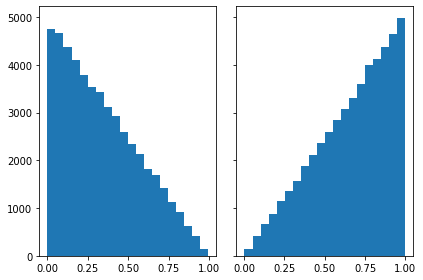

In [26]:
def check_distributon(X, Y):
    X0 = []
    X1 = []
    for i in range(len(Y)):
        if Y[i] == 0:
            X0.append(X[i])
        else:
            X1.append(X[i])
    fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
    axs[0].hist(X0, bins=20)
    axs[1].hist(X1, bins=20)
    
check_distributon(X,Y)